In [6]:
from keras.applications import VGG16

In [7]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [8]:
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 18,910,017
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(8192, 512) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(512, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [13]:
vgg_base.trainable = False

In [15]:
model.compile('rmsprop','binary_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=60, validation_data=validation_generator, validation_steps=30)

Epoch 1/10
60/60 [==============================] - 1570s 26s/step - loss: 2.8219 - acc: 0.6083 - val_loss: 1.7104 - val_acc: 0.5312
Epoch 2/10
60/60 [==============================] - 1515s 25s/step - loss: 0.7363 - acc: 0.7214 - val_loss: 0.3737 - val_acc: 0.8429
Epoch 3/10
60/60 [==============================] - 1497s 25s/step - loss: 0.6035 - acc: 0.7578 - val_loss: 0.8973 - val_acc: 0.6656
Epoch 4/10
60/60 [==============================] - 1504s 25s/step - loss: 0.5740 - acc: 0.7552 - val_loss: 0.3533 - val_acc: 0.8568
Epoch 5/10
60/60 [==============================] - 1475s 25s/step - loss: 0.4558 - acc: 0.8063 - val_loss: 1.0959 - val_acc: 0.6036
Epoch 6/10
60/60 [==============================] - 1509s 25s/step - loss: 0.4519 - acc: 0.7948 - val_loss: 0.6724 - val_acc: 0.7041
Epoch 7/10
60/60 [==============================] - 1502s 25s/step - loss: 0.4573 - acc: 0.7875 - val_loss: 0.4326 - val_acc: 0.7949
Epoch 8/10
60/60 [==============================] - 1542s 26s/step - 

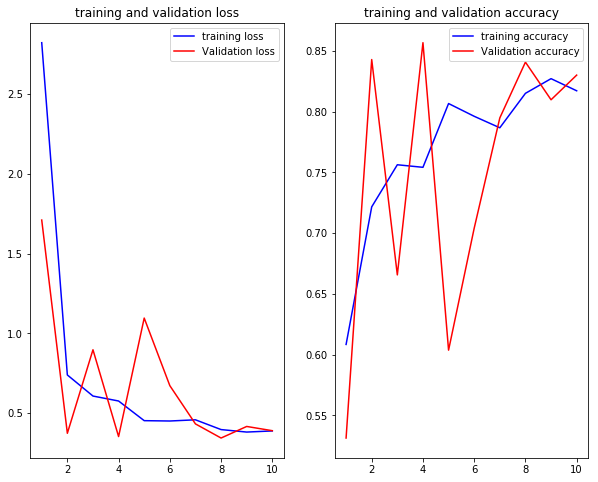

In [19]:
loss, acc, val_loss, val_acc, epochs = return_history_values(history)
plot_acc_loss(loss, acc, val_loss, val_acc, epochs)